In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#plt.style.use('seaborn-whitegrid')
#plt.style.use("seaborn-v0_8-whitegrid")
#plt.style.use("seaborn-v0_8")
plt.style.use("seaborn-v0_8-whitegrid")

In [157]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

#### Datasetin alkutarkastus

In [158]:
# datan alkutarkistus
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [159]:
df.describe()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [160]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [161]:
df.tail()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN
81,82,2,35,2,3.0,15.0,2183,3,4.0,4,3,4,1.0,NaN,NaN,NaN


In [162]:

# datan siivous, pudotetaan pois eka ja 4 vikaa saraketta
df=df.drop(columns= ['number', 'healtcare', 'holidayCabin', 'gym', 'muscleCare'])
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [163]:
# tarkistetaan datasetti uudestaan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [164]:
df.isnull().sum()


gender                    0
age                       0
family                    0
education                 1
years_of_service          2
salary                    0
sat_management            0
sat_colleques             1
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [165]:
df.count()

gender                    82
age                       82
family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
dtype: int64

In [166]:
for var in df:
    print(var, df[var].unique())

gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [ 1.  2.  3.  4. nan]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [ 3.  5.  4.  2. nan]
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]


#### Perhemuuttuja / Family



In [167]:
# Family / perhemuuttuja - luokkamuuttuja
# single = 1
# not single = 2
# 82 vastausta

df.nlargest(n = 3, columns = 'family')
# en ymmärrä mitä iloa tästä on, mutta siis top kolme "ei sinkkua"

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
5,2,31,2,2.0,14.0,1910,4,4.0,5,2,4


In [168]:
df.nsmallest(n = 3, columns = 'family')
# samoin tämä, kolme "alinta" sinkkua

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [169]:
df_family=pd.crosstab(df['family'], 'Count')

In [170]:
df_family
# sinkkumittarin jakautuminen
# single = 1
# not single = 2

col_0,Count
family,
1,31
2,51


In [171]:
df_family.index=['perheetön', 'perheellinen']
df_family.columns.name=''
df_family

,Count
perheetön,31
perheellinen,51


<Axes: >

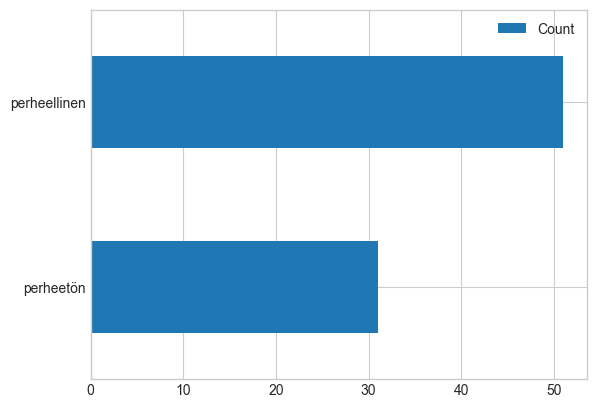

In [172]:
# TÄTÄ EI ILMEISESTI SAANUT KÄYTTÄÄ MUTTA KOKEILLAAN NYT KUITENKIN
df_family.plot.barh()

##### Perhetilanne taulukko

Text(0.5, 0, 'vastaajia, N=82')

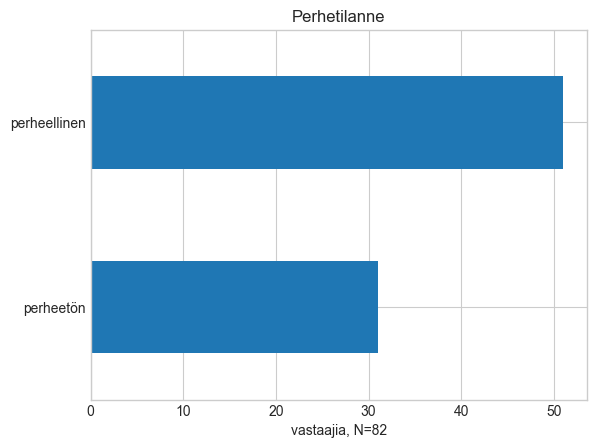

In [173]:
# TÄTÄ EI ILMEISESTI SAANUT KÄYTTÄÄ MUTTA KOKEILLAAN NYT KUITENKIN
df_family.plot.barh(legend = False)

plt.title('Perhetilanne')
plt.xlabel('vastaajia, N=82')

In [174]:
# perhestatus prosentteina

df_family_prosentti = pd.crosstab(df['family'], 'määrä')
df_family_prosentti['%'] = df_family_prosentti['määrä'] / df_family_prosentti['määrä'].sum() * 100
df_family_prosentti.index = ['perheetön', 'perheellinen']
df_family_prosentti.columns.name = ''
df_family_prosentti

,määrä,%
perheetön,31,37.804878
perheellinen,51,62.195122


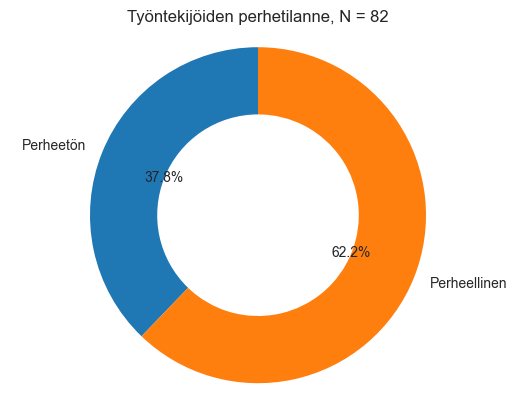

In [211]:
labels = ['Perheetön', 'Perheellinen']
values = df_family_prosentti['%']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.axis('equal')
plt.title('Työntekijöiden perhetilanne, N = 82')
plt.show()

##### Perhetilanteen vertailu sat-muuttujiin

In [231]:
df_perhe_johto = pd.crosstab(df['family'], df['sat_management']) 
#df_perhe_johto.index = ['perheetön', 'perheellinen']
df_perhe_johto

sat_management,1,2,3,4,5
family,,,,,
1,4,7,13,6,1
2,3,9,17,17,5


In [245]:
# TYYTYVÄISYYS JOHTOON / sat_management
# ovatko perheelliset tyytyväisempiä johtoon / johtamiseen kuin ei-perheelliset?


# subset

df_perhe_johto = pd.crosstab(df['sat_management'], df['family'])
df_perhe_johto.index= ['tyytymätön', 'ei hyvä', 'ok', 'ihan jees', 'tosi hyvä' ]
df_perhe_johto.columns = ['perheetön', 'perheellinen']
df_perhe_johto.columns.name='Tyytyväisyys johtoon'
df_perhe_johto.loc['Vastaajien määrä yht.'] = df_perhe_johto.sum()
df_perhe_johto



Tyytyväisyys johtoon,perheetön,perheellinen
tyytymätön,4,3
ei hyvä,7,9
ok,13,17
ihan jees,6,17
tosi hyvä,1,5
Vastaajien määrä yht.,31,51


In [243]:
# taulukko prosentteina

df_perhe_johto = pd.crosstab(df['sat_management'], df['family'], normalize = 'columns') * 100
df_perhe_johto.index= ['tyytymätön', 'ei hyvä', 'ok', 'ihan jees', 'tosi hyvä' ]
df_perhe_johto.columns = ['perheetön', 'perheellinen']
df_perhe_johto.columns.name='Tyytyväisyys johtoon'
df_perhe_johto.loc['Yhteensä'] = df_perhe_johto.sum()
df_perhe_johto

Tyytyväisyys johtoon,perheetön,perheellinen
tyytymätön,12.903226,5.882353
ei hyvä,22.580645,17.647059
ok,41.935484,33.333333
ihan jees,19.354839,33.333333
tosi hyvä,3.225806,9.803922
Yhteensä,100.000000,100.000000


In [ ]:
## KESKEN JÄÄTY TÄHÄN!!!

#### Työskentelyvuodet / years_of_service

In [175]:
# years_of_service / työskentelyvuodet - numeerinen muuttuja, joka muutettava luokiteltavaksi muuttujaksi
# the years of service for the company - eli siis vain täydet vuodet / jos työskennellyt alle vuoden, on arvo 0?
# 80 vastausta / 82 
# täällä on kaksi riviä, joissa ei ole lainkaan arvoa - etsi ja tarkista

In [176]:
df.nlargest(n = 3, columns = 'years_of_service')
# pisimpään työskennellyt 36 vuotta

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,NaN,2,1,5
44,1,55,2,1.0,35.0,2651,4,5.0,4,2,4
45,2,51,2,1.0,28.0,1989,3,3.0,2,2,3


In [177]:
df.nsmallest(n = 3, columns = 'years_of_service')
# lyhyimmän aikaa 0 vuotta eli alle 1 vuoden?

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
35,1,31,2,3.0,0.0,1559,2,4.0,3,1,3
61,1,40,2,1.0,0.0,1872,2,3.0,1,2,3


In [178]:
# puuttuvien rivien määrä 2
df.isnull().sum()

gender                    0
age                       0
family                    0
education                 1
years_of_service          2
salary                    0
sat_management            0
sat_colleques             1
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [179]:
# NaN & 0 rivit palvelusvuosissa --> NaN rivit 29 ja 57
nan_or_zero_rows = df[df['years_of_service'].isna() | (df['years_of_service'] == 0)]
print(nan_or_zero_rows)

    gender  age  family  education  years_of_service  salary  sat_management  \
7        1   55       1        1.0               0.0    2066               3   
29       1   21       1        NaN               NaN    1949               4   
35       1   31       2        3.0               0.0    1559               2   
57       1   38       2        2.0               NaN    2574               2   
61       1   40       2        1.0               0.0    1872               2   
77       1   22       1        3.0               0.0    1598               4   

    sat_colleques  sat_workingEnvironment  sat_salary  sat_tasks  
7             5.0                       3           1          3  
29            4.0                       3           3          2  
35            4.0                       3           1          3  
57            3.0                       1           1          2  
61            3.0                       1           2          3  
77            4.0                    

In [180]:
nan_rows = df[df['years_of_service'].isna()]
print(nan_rows)

    gender  age  family  education  years_of_service  salary  sat_management  \
29       1   21       1        NaN               NaN    1949               4   
57       1   38       2        2.0               NaN    2574               2   

    sat_colleques  sat_workingEnvironment  sat_salary  sat_tasks  
29            4.0                       3           3          2  
57            3.0                       1           1          2  


In [181]:
# subsetti, josta poistettu nan rivit
df_palvelusvuodet_ilman_tyhjiä = df.dropna(subset=['years_of_service'])
df_palvelusvuodet_ilman_tyhjiä = df[df['years_of_service'].notna()]

df_palvelusvuodet_ilman_tyhjiä.isnull().sum()



gender                    0
age                       0
family                    0
education                 0
years_of_service          0
salary                    0
sat_management            0
sat_colleques             1
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [182]:
# lasketaan keskiarvo 
palvelusvuodet_ka = df_palvelusvuodet_ilman_tyhjiä['years_of_service'].mean()
print(palvelusvuodet_ka)

12.175


In [183]:
# pyöristetään keskiarvo lähimpään täyteen lukuun, koska työskentelyvuodet ovat täysiä lukuja

palvelusvuodet_ka_pyoristetty = round(palvelusvuodet_ka)
print(palvelusvuodet_ka_pyoristetty)

12


In [184]:
# mediaani
palvelusvuodet_mediaani = df_palvelusvuodet_ilman_tyhjiä['years_of_service'].median()
print(palvelusvuodet_mediaani)

12.5


In [185]:
# täytetään tyhjien rivien nan arvot keskiarvolla

df['years_of_service'].fillna(palvelusvuodet_ka_pyoristetty,inplace=True)

C:\Users\SiniS\AppData\Local\Temp\ipykernel_6852\465653198.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['years_of_service'].fillna(palvelusvuodet_ka_pyoristetty,inplace=True)


In [186]:
df.isnull().sum()

gender                    0
age                       0
family                    0
education                 1
years_of_service          0
salary                    0
sat_management            0
sat_colleques             1
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [187]:
# tarkistetaan onko arvot taulukossa riveillä 29 & 57
specific_row = df.loc[29]
print(specific_row)

gender                       1.0
age                         21.0
family                       1.0
education                    NaN
years_of_service            12.0
salary                    1949.0
sat_management               4.0
sat_colleques                4.0
sat_workingEnvironment       3.0
sat_salary                   3.0
sat_tasks                    2.0
Name: 29, dtype: float64


In [188]:
specific_row = df.loc[57]
print(specific_row)

gender                       1.0
age                         38.0
family                       2.0
education                    2.0
years_of_service            12.0
salary                    2574.0
sat_management               2.0
sat_colleques                3.0
sat_workingEnvironment       1.0
sat_salary                   1.0
sat_tasks                    2.0
Name: 57, dtype: float64


##### Palvelusvuosien keskijakauma

Text(0.5, 0, 'Palvelusvuodet, n=82')

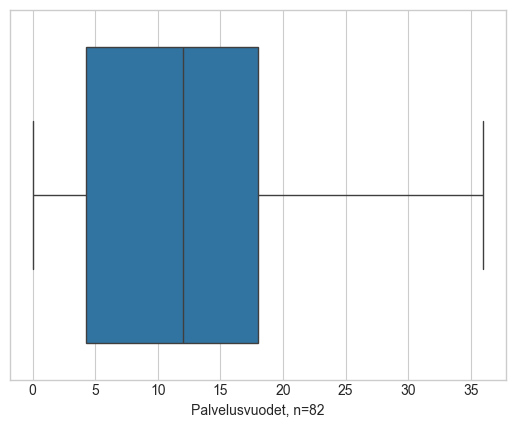

In [189]:
# PALVELUSVUOSIEN KESKIJAKAUMA
ax3 = sns.boxplot(x = df['years_of_service'])

ax3.set_xlabel('Palvelusvuodet, n=' + str(df['years_of_service'].count()))

In [190]:
# jakaminen laatikoihin
# min 0, max 36
# 0-5, 5-15, 15-25, 25-(36)

bins = [0, 5, 15, 25, 37]
df['palvelusvuosiluokka'] = pd.cut(df['years_of_service'], bins = bins,right=False)

In [191]:
df

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,palvelusvuosiluokka
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"[15, 25)"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"[5, 15)"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"[5, 15)"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"[5, 15)"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"[0, 5)"
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,"[0, 5)"
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,"[0, 5)"
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,"[5, 15)"
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,"[15, 25)"


In [192]:
df_palvelusvuodet = pd.crosstab(df['palvelusvuosiluokka'], 'Yht')

df_palvelusvuodet.columns.name = ''





In [193]:
df_palvelusvuodet

,Yht
palvelusvuosiluokka,
"[0, 5)",21
"[5, 15)",25
"[15, 25)",32
"[25, 37)",4


Text(0.5, 0, 'vastaajia, N=80')

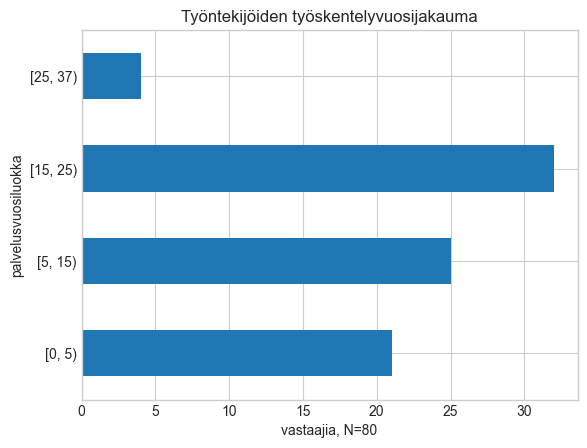

In [194]:
df_palvelusvuodet.plot.barh(legend = False)

plt.title('Työntekijöiden työskentelyvuosijakauma')
plt.xlabel('vastaajia, N=80')

In [195]:
# Prosenteiksi
n = df_palvelusvuodet['Yht'].sum()
df_palvelusvuodet['%'] = df_palvelusvuodet / n * 100

In [196]:
df_palvelusvuodet

,Yht,%
palvelusvuosiluokka,,
"[0, 5)",21,25.609756
"[5, 15)",25,30.487805
"[15, 25)",32,39.024390
"[25, 37)",4,4.878049


In [197]:
type(df_palvelusvuodet.index.values[0])


pandas._libs.interval.Interval

In [198]:
df_palvelusvuodet.index = df_palvelusvuodet.index.astype(str)
df_palvelusvuodet.loc['Yhteensä'] = df_palvelusvuodet.sum()


In [199]:
df_palvelusvuodet

,Yht,%
palvelusvuosiluokka,,
"[0, 5)",21.0,25.609756
"[5, 15)",25.0,30.487805
"[15, 25)",32.0,39.024390
"[25, 37)",4.0,4.878049
Yhteensä,82.0,100.000000


In [200]:
type(df_palvelusvuodet.index.values[0])

str

In [201]:
# SIIVOTTU TAULUKKO ESITYKSEEN!

df_palvelusvuodet.style.format({'Yht': '{:.0f}', '%': '{:.1f} %'})

,Yht,%
palvelusvuosiluokka,,
"[0, 5)",21,25.6 %
"[5, 15)",25,30.5 %
"[15, 25)",32,39.0 %
"[25, 37)",4,4.9 %
Yhteensä,82,100.0 %


##### Palvelusvuodet jaoteltuna piirakkamuodossa

In [223]:
data = {
    'palvelusvuosiluokka': ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta'],
    'Yht': [21, 23, 32, 4],
    '%': [26.2, 28.7, 40.0, 5.0]
}

df_palveluspiirakka = pd.DataFrame(data)

total = df_palveluspiirakka['Yht'].sum()
plt.figure(figsize=(8, 8))
plt.pie(df['Yht'], labels=df_palveluspiirakka['palvelusvuosiluokka'], autopct='%1.1f%%', startangle=90)
plt.title(f'Työntekijät luokiteltuna palvelusvuosien perusteella (Yht: {total})')
plt.show()

KeyError: 'Yht'

<Figure size 800x800 with 0 Axes>